In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
class Neuralstructure:
    """
    input_size: number of input nodes
    layers: number of hidden layers
    nodes_per_layer: number of nodes per hidden layer
    output_size: number of output nodes

    """
    def __init__(self):
        self.input_size = 20
        self.layers = 3
        self.nodes_per_layer = [14,8,3]
        self.output_size = 1
        self.weights = []
        self.bias = np.random.rand()
        self.init_weights()
    
    def init_weights(self):
        for i in range(self.layers):
            if i == 0:
                self.weights.append(np.around(np.random.rand(self.input_size, self.nodes_per_layer[i]), 3))
            else:
                self.weights.append(np.around(np.random.rand(self.nodes_per_layer[i-1], self.nodes_per_layer[i]), 3))
        self.weights.append(np.around(np.random.rand(self.nodes_per_layer[self.layers-1], self.output_size), 3))
    

In [131]:
class Neuralimage :
    def __init__(self, structure, weights, bias) :
        self.structure = structure
        self.weights = weights
        self.weight_list = [item for row in self.weights for item in row]
        self.weight_list = [item for row in self.weight_list for item in row]
        self.bias = bias
        self.weight_dict = {}
        self.image = self.generate_image()
        

    def generate_image(self):
        layer_x_val = [(i + 1) for i in range(len(self.structure))]
        layer_y_val = []
        for i in range(len(self.structure)):
            layer_y_val.append([j + 1 for j in range(self.structure[i])])

        for x in layer_x_val:
            for y in layer_y_val[x - 1]:
                plt.scatter(x*2, y, color='lightblue', s = 400, alpha=1)
                plt.text(x*2, y, f'{y}', fontsize=12, ha='right')

        line = 0 
        for x in range(len(layer_x_val)):
            for y in range(len( layer_y_val[x])):
                if x + 1 < len(layer_x_val):
                    for z in range(len(layer_y_val[x + 1])):

                        plt.plot([(x + 1)*2, (x + 2)*2], [layer_y_val[x][y], layer_y_val[x + 1][z]], color='black', alpha=0.5, linewidth=2)
                        plt.text((x + 1 + x + 2) , (layer_y_val[x][y] + layer_y_val[x + 1][z]) / 2,  'W' + str(line)+ '=' + f'{self.weight_list[line]}', fontsize=8, ha='right') #TODO: add the weigth labels casue probelems
                        self.weight_dict['W' + str(line)] = self.weight_list[line]
                        line += 1
                    

        plt.title('Neural Network')
        plt.xlabel('Layer')
        plt.ylabel('Neuron')
        plt.show()

        

        
        

In [132]:
class NeuralNetwork:
    def __init__(self, structure: Neuralstructure , learning_rate: float, function, error_function):
        self.structure = structure
        self.weights = structure.weights
        self.bias = structure.bias
        self.layers = structure.layers
        self.nodes_per_layer = structure.nodes_per_layer
        self.input_size = structure.input_size
        self.output_size = structure.output_size
        self.learning_rate = learning_rate
        self.outputs = []
        self.function = function
        self.error_function = error_function
        image_structure = self.nodes_per_layer
        image_structure.append(self.output_size)
        self.image = Neuralimage(image_structure, self.weights, self.bias)

    def get_weights_dict(self):
        return self.image.weight_dict
        

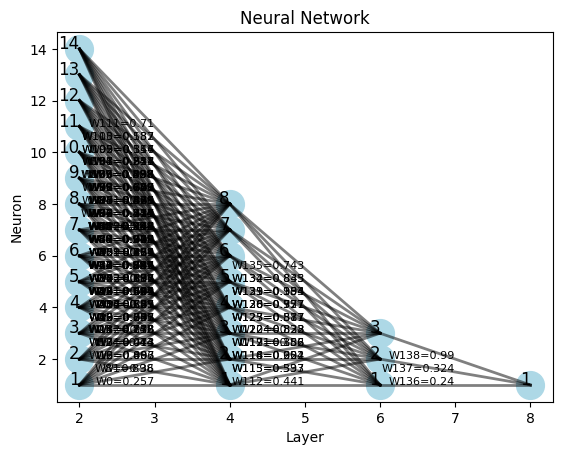

In [133]:
structure = Neuralstructure()
network = NeuralNetwork(structure, 0.01, 'sigmoid', 'mean_squared_error')

{'W0': 0.257, 'W1': 0.36, 'W2': 0.097, 'W3': 0.013, 'W4': 0.718, 'W5': 0.743, 'W6': 0.03, 'W7': 0.364, 'W8': 0.898, 'W9': 0.406, 'W10': 0.044, 'W11': 0.875, 'W12': 0.296, 'W13': 0.27, 'W14': 0.491, 'W15': 0.594, 'W16': 0.883, 'W17': 0.473, 'W18': 0.158, 'W19': 0.001, 'W20': 0.641, 'W21': 0.43, 'W22': 0.16, 'W23': 0.286, 'W24': 0.44, 'W25': 0.742, 'W26': 0.035, 'W27': 0.81, 'W28': 0.302, 'W29': 0.637, 'W30': 0.792, 'W31': 0.04, 'W32': 0.36, 'W33': 0.632, 'W34': 0.69, 'W35': 0.623, 'W36': 0.152, 'W37': 0.999, 'W38': 0.433, 'W39': 0.308, 'W40': 0.837, 'W41': 0.725, 'W42': 0.594, 'W43': 0.75, 'W44': 0.885, 'W45': 0.124, 'W46': 0.949, 'W47': 0.394, 'W48': 0.535, 'W49': 0.669, 'W50': 0.832, 'W51': 0.644, 'W52': 0.371, 'W53': 0.007, 'W54': 0.746, 'W55': 0.251, 'W56': 0.644, 'W57': 0.397, 'W58': 0.716, 'W59': 0.59, 'W60': 0.036, 'W61': 0.948, 'W62': 0.235, 'W63': 0.441, 'W64': 0.183, 'W65': 0.844, 'W66': 0.232, 'W67': 0.793, 'W68': 0.282, 'W69': 0.379, 'W70': 0.125, 'W71': 0.173, 'W72': 0.127,